C:\Users\Hatim\AppData\Local\Temp\ipykernel_2960\2059854910.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Epoch 1/5


c:\Users\Hatim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


843/843 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9084 - loss: 0.1940 - val_accuracy: 0.9838 - val_loss: 0.0454
Epoch 2/5
843/843 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9931 - loss: 0.0206 - val_accuracy: 0.9828 - val_loss: 0.0535
Epoch 3/5
843/843 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9874 - val_loss: 0.0514
Epoch 4/5
843/843 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9982 - loss: 0.0062 - val_accuracy: 0.9892 - val_loss: 0.0446
Epoch 5/5
843/843 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9872 - val_loss: 0.0630
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9883 - loss: 0.0548
Test Accuracy: 98.72%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Prediction: spam


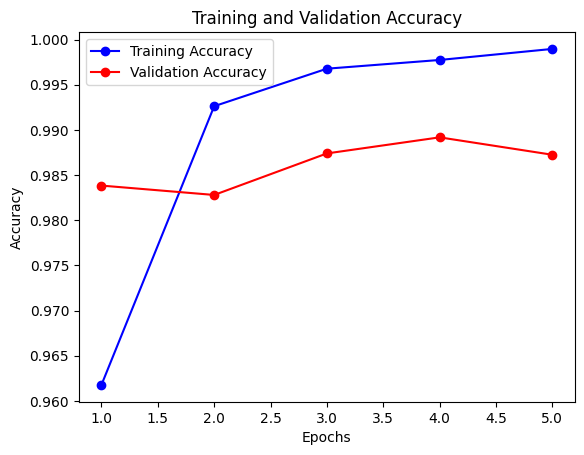

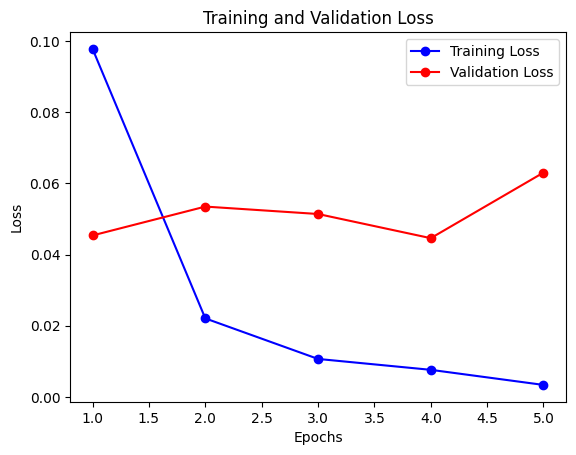

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('enron_spam_data.csv')

# Preprocess the dataset
def clean_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    return text

df['Text'] = df['Subject'].fillna('') + ' ' + df['Message'].fillna('')
df['Text'] = df['Text'].apply(clean_text)

# Encode labels
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Spam/Ham'])

# Tokenization and Padding
MAX_WORDS = 10000
MAX_LEN = 100
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(sequences, maxlen=MAX_LEN)
y = df['Label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = Sequential()
model.add(Embedding(MAX_WORDS, 128, input_length=MAX_LEN))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict the spam/ham category of new messages
def predict_spam_ham(text):
    cleaned_text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=MAX_LEN)
    prediction = model.predict(padded_sequence)
    return label_encoder.inverse_transform(np.argmax(prediction, axis=1))[0]

# Example prediction
example_text = "Win a brand new car! Click here for details."
print(f"Prediction: {predict_spam_ham(example_text)}")

# Plotting training accuracy and loss
def plot_training_metrics(history, img_prefix='training'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Accuracy plot
    plt.figure()
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'{img_prefix}_accuracy.png')  # Save as image
    plt.show()

    # Loss plot
    plt.figure()
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'{img_prefix}_loss.png')  # Save as image
    plt.show()

# Generate and save the plots
plot_training_metrics(history, img_prefix='enron_spam_detection')
